In [16]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report  

data = pd.read_csv('promoter_processed.csv')
data['Strengths'] = data['Strengths'].replace(1,2)
data['Strengths'] = data['Strengths'].replace(0,1)
data['Strengths'] = data['Strengths'].replace(-1,0)

data

,Sequences,Strengths
0,tagatgtccttgattaacaccaaaattaaaccttttaaaaaccagg...,2
1,aaagaaaataattaattttacagctgttaaaccaaacggttataac...,2
2,ctgctgttccttgcgatcgaaaagatcaagggcggaccggtatccg...,2
3,gcggaagcacaaattgcaccaggtacggaactaaaagccgtagatg...,2
4,aaatacttatggtgcgctggcttctttggaacttgcgcagcaattt...,2
...,...,...
6641,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0
6642,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0
6643,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0
6644,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0


In [17]:
print(len(data[data['Strengths']==2]))
embeddings = np.load('all_embeddings_100m_mean.npy')

num_features = embeddings.shape[1]
embeddings_df = pd.DataFrame(data=embeddings, columns=[f'feature_{i}' for i in range(num_features)])
combined_df = pd.concat([data, embeddings_df], axis=1)
combined_df

1473


,Sequences,Strengths,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
0,tagatgtccttgattaacaccaaaattaaaccttttaaaaaccagg...,2,-0.936847,-0.781433,-0.525665,-0.327091,-0.618907,-0.142214,0.555200,-0.227962,...,0.693298,-0.431873,-0.034174,0.701798,-0.867468,-0.268788,-0.084448,0.357413,-0.061708,-0.153779
1,aaagaaaataattaattttacagctgttaaaccaaacggttataac...,2,-0.946999,-0.824914,-0.470066,-0.244439,-0.711039,-0.126911,0.556981,-0.249472,...,0.678970,-0.519048,-0.002377,0.652751,-0.911779,-0.233074,0.052144,0.210270,-0.042073,-0.101237
2,ctgctgttccttgcgatcgaaaagatcaagggcggaccggtatccg...,2,-0.946999,-0.824914,-0.470066,-0.244439,-0.711039,-0.126911,0.556981,-0.249472,...,0.678970,-0.519048,-0.002377,0.652751,-0.911779,-0.233074,0.052144,0.210270,-0.042073,-0.101237
3,gcggaagcacaaattgcaccaggtacggaactaaaagccgtagatg...,2,-0.936847,-0.781433,-0.525665,-0.327091,-0.618907,-0.142214,0.555200,-0.227962,...,0.693298,-0.431873,-0.034174,0.701798,-0.867468,-0.268788,-0.084448,0.357413,-0.061708,-0.153779
4,aaatacttatggtgcgctggcttctttggaacttgcgcagcaattt...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
6642,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
6643,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
6644,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114


In [22]:
class_0 = combined_df[combined_df['Strengths'] == 0]
class_0_downsampled = resample(class_0, replace=False, n_samples=1473, random_state=42)
class_2 = combined_df[combined_df['Strengths']==2]

In [23]:
class_0_downsampled

,Sequences,Strengths,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
3666,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
3585,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
3721,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
4143,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
4802,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
4154,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
5180,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
6204,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114


In [24]:
class_2

,Sequences,Strengths,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
0,tagatgtccttgattaacaccaaaattaaaccttttaaaaaccagg...,2,-0.936847,-0.781433,-0.525665,-0.327091,-0.618907,-0.142214,0.555200,-0.227962,...,0.693298,-0.431873,-0.034174,0.701798,-0.867468,-0.268788,-0.084448,0.357413,-0.061708,-0.153779
1,aaagaaaataattaattttacagctgttaaaccaaacggttataac...,2,-0.946999,-0.824914,-0.470066,-0.244439,-0.711039,-0.126911,0.556981,-0.249472,...,0.678970,-0.519048,-0.002377,0.652751,-0.911779,-0.233074,0.052144,0.210270,-0.042073,-0.101237
2,ctgctgttccttgcgatcgaaaagatcaagggcggaccggtatccg...,2,-0.946999,-0.824914,-0.470066,-0.244439,-0.711039,-0.126911,0.556981,-0.249472,...,0.678970,-0.519048,-0.002377,0.652751,-0.911779,-0.233074,0.052144,0.210270,-0.042073,-0.101237
3,gcggaagcacaaattgcaccaggtacggaactaaaagccgtagatg...,2,-0.936847,-0.781433,-0.525665,-0.327091,-0.618907,-0.142214,0.555200,-0.227962,...,0.693298,-0.431873,-0.034174,0.701798,-0.867468,-0.268788,-0.084448,0.357413,-0.061708,-0.153779
4,aaatacttatggtgcgctggcttctttggaacttgcgcagcaattt...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,tgggtaaaactttgtcgcgggaatgatgacaaatcccagggaaaaa...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
1469,aagcctctgctacgtaagggttatagcttttgccttaaagatgcat...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
1470,taacgcatgaggctaccttgtatccattgcttctggcaacattaag...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
1471,tgcgttaatagatatggaaagcggctcggagagaaaagcaaaaggt...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114


In [27]:
total_df = pd.concat([class_0_downsampled,class_2])
total_df

,Sequences,Strengths,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
3666,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
3585,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
3721,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
4143,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
4802,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,tgggtaaaactttgtcgcgggaatgatgacaaatcccagggaaaaa...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
1469,aagcctctgctacgtaagggttatagcttttgccttaaagatgcat...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
1470,taacgcatgaggctaccttgtatccattgcttctggcaacattaag...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
1471,tgcgttaatagatatggaaagcggctcggagagaaaagcaaaaggt...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114


In [28]:
total_df['binary_label'] = total_df['Strengths'].apply(lambda x: 1 if x == 2 else 0)
total_df

,Sequences,Strengths,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279,binary_label
3666,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114,0
3585,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114,0
3721,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114,0
4143,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114,0
4802,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,0,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,tgggtaaaactttgtcgcgggaatgatgacaaatcccagggaaaaa...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114,1
1469,aagcctctgctacgtaagggttatagcttttgccttaaagatgcat...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114,1
1470,taacgcatgaggctaccttgtatccattgcttctggcaacattaag...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114,1
1471,tgcgttaatagatatggaaagcggctcggagagaaaagcaaaaggt...,2,-0.939334,-0.752792,-0.355315,-0.209782,-0.64472,-0.147364,0.547578,-0.24462,...,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114,1


In [29]:
X = total_df.drop(['Strengths', 'binary_label', 'Sequences'], axis=1)
y = total_df['binary_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8144796380090498
F1 Score: 0.7696629213483146
Recall: 0.6255707762557078
Precision: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       446
           1       1.00      0.63      0.77       438

    accuracy                           0.81       884
   macro avg       0.87      0.81      0.81       884
weighted avg       0.86      0.81      0.81       884



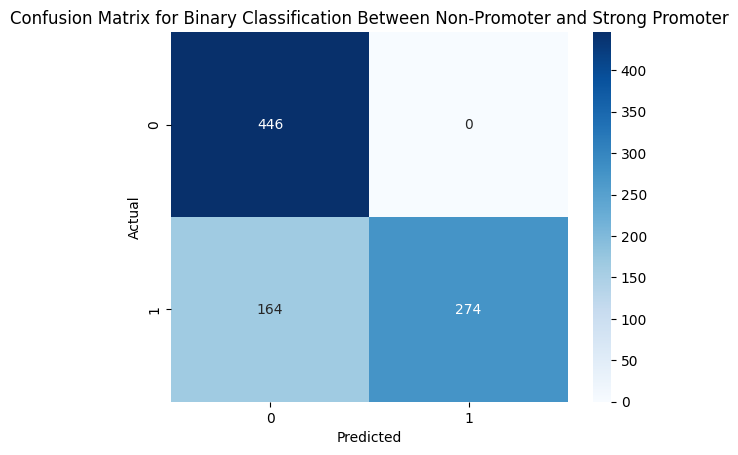

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Binary Classification Between Non-Promoter and Strong Promoter')
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)

print("Random Forest Classifier Metrics:")
print("Accuracy:", rf_accuracy)
print("F1 Score:", rf_f1)
print("Recall:", rf_recall)
print("Precision:", rf_precision)

Random Forest Classifier Metrics:
Accuracy: 0.8144796380090498
F1 Score: 0.7696629213483146
Recall: 0.6255707762557078
Precision: 1.0


In [36]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svc_classifier = SVC()

# Train the classifier
svc_classifier.fit(X_train, y_train)

# Make predictions
svc_predictions = svc_classifier.predict(X_test)

# Evaluate the classifier
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)
svc_recall = recall_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)

print("Support Vector Classifier Metrics:")
print("Accuracy:", svc_accuracy)
print("F1 Score:", svc_f1)
print("Recall:", svc_recall)
print("Precision:", svc_precision)


Support Vector Classifier Metrics:
Accuracy: 0.8144796380090498
F1 Score: 0.7696629213483146
Recall: 0.6255707762557078
Precision: 1.0


In [37]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Evaluate the classifier
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       446
           1       1.00      0.63      0.77       438

    accuracy                           0.81       884
   macro avg       0.87      0.81      0.81       884
weighted avg       0.86      0.81      0.81       884

